In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df = pd.read_excel("/content/drive/MyDrive/Raisin_Dataset.csv")

Mounted at /content/drive


In [2]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [5]:
data= pd.DataFrame(df, columns = df.columns)

In [6]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [7]:
data.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [8]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

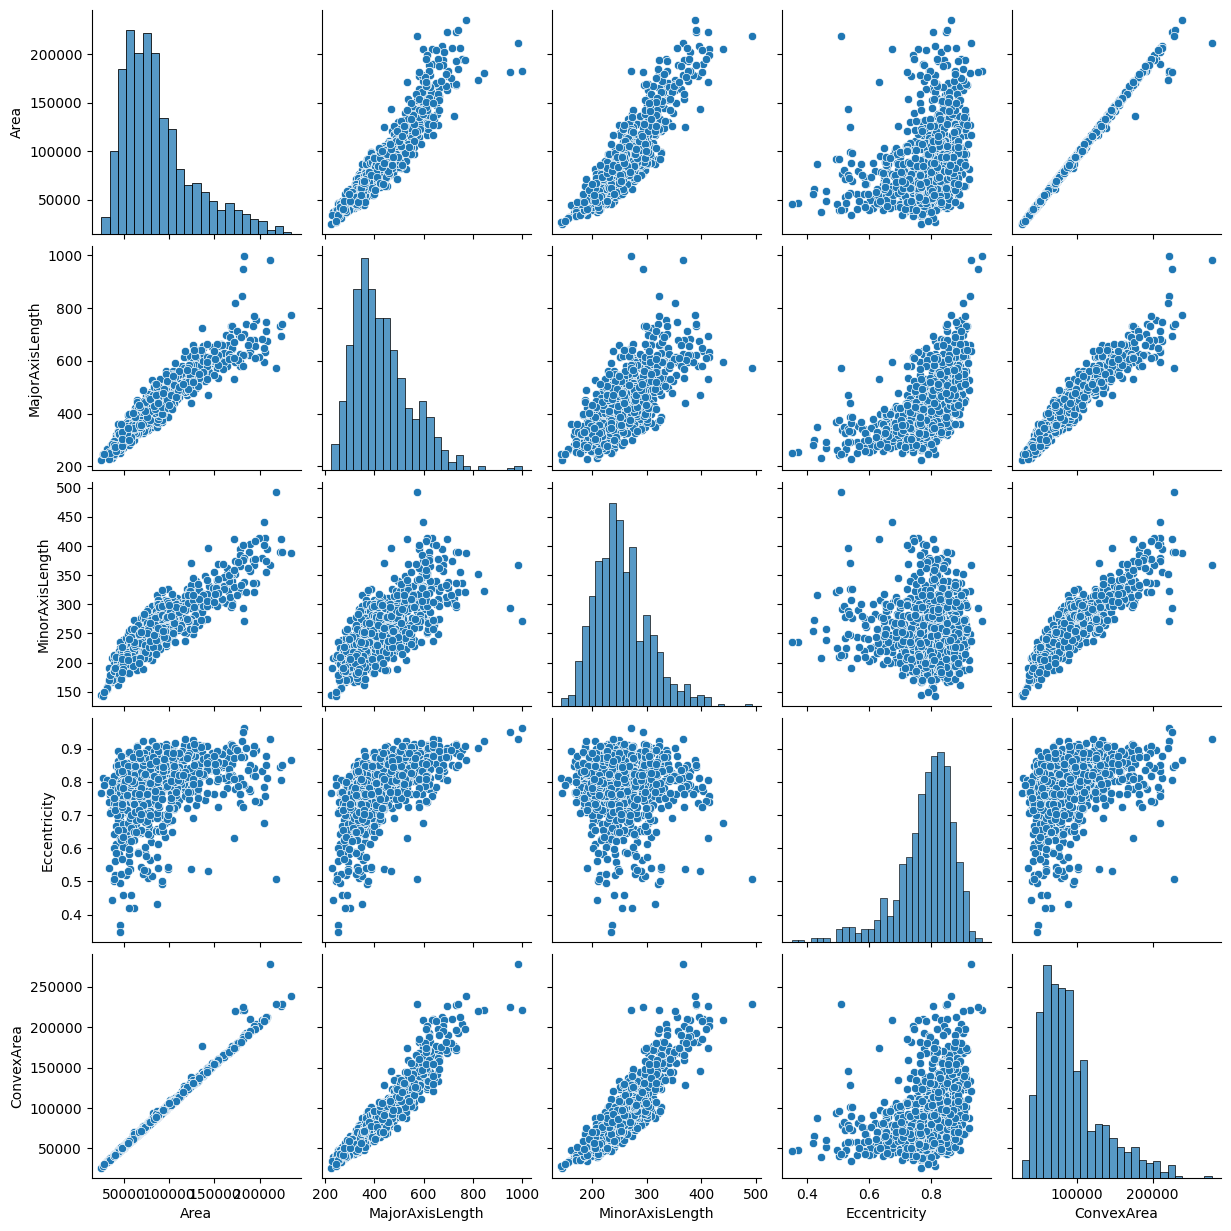

In [9]:
import seaborn as sns

sns.pairplot(data,
             vars=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea'])
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
  data[i]=le.fit_transform(data[i])

In [11]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1
...,...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461,0
896,549,546,540,508,549,99,577,0
897,640,517,739,174,650,722,656,0
898,600,633,506,683,600,177,622,0


In [13]:
#Splitting the data into training and test test
X = data.iloc[:,0:6].values
y = data.iloc[:,7].values
#추출

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [14]:
y_train

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [15]:
X

array([[551, 553, 500, 558, 542, 811],
       [404, 446, 409, 469, 413, 299],
       [583, 554, 581, 448, 571, 102],
       ...,
       [640, 517, 739, 174, 650, 722],
       [600, 633, 506, 683, 600, 177],
       [529, 706, 200, 877, 532,  82]])

In [16]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [40]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(200,input_shape=(6,),activation='ReLU'))
model.add(Dense(100,activation='ReLU'))
model.add(Dense(50,activation='ReLU'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 200)               1400      
                                                                 
 dense_25 (Dense)            (None, 100)               20100     
                                                                 
 dense_26 (Dense)            (None, 50)                5050      
                                                                 
 dense_27 (Dense)            (None, 2)                 102       
                                                                 
Total params: 26,652
Trainable params: 26,652
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [41]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 39.4540 - accuracy: 0.6319 - val_loss: 1.9888 - val_accuracy: 0.6556
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5450 - accuracy: 0.7653 - val_loss: 0.4655 - val_accuracy: 0.8333
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4532 - accuracy: 0.7972 - val_loss: 0.4567 - val_accuracy: 0.8333
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4637 - accuracy: 0.8139 - val_loss: 0.4084 - val_accuracy: 0.8389
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4166 - accuracy: 0.8194 - val_loss: 0.3542 - val_accuracy: 0.8500
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.7986 - val_loss: 0.3809 - val_accuracy: 0.8278
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4044 - accuracy: 0.8278 - val_loss: 0.3979 - val_accuracy: 0.8611
Epoch 8/100

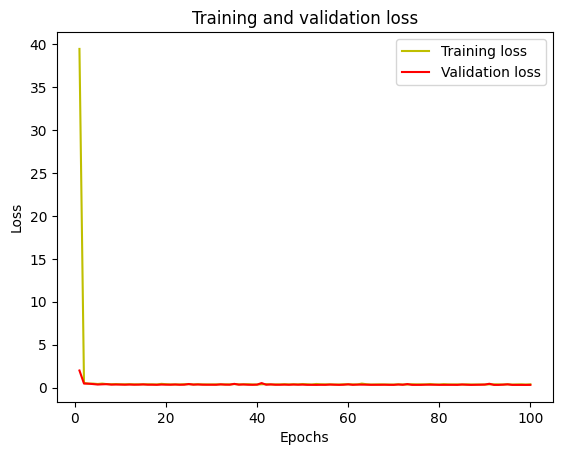

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

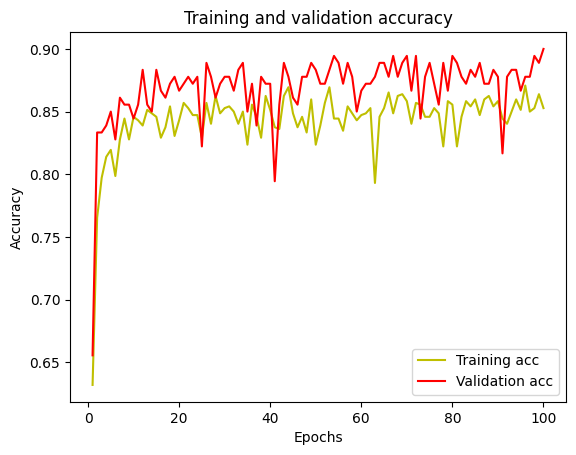

In [43]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        97
           1       0.87      0.92      0.89        83

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180

[[86 11]
 [ 7 76]]
